In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib. collections import PatchCollection
import sys 
# sys.path.append('../')

from build_solver import build_erg_time_opt_solver

In [2]:
args = {
    'N' : 800, 
    'x0' : np.array([2.0, 2.2])*1,
    'xf' : np.array([98.8, 92.0])*1,
    'erg_ub' : 0.0001,
    'alpha' : 0.9,
    'wrksp_bnds' : np.array([[0.,100.],[0.,100.]])
}

In [3]:
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=20_000, eps=1e-8, alpha=1.00001)

I0000 00:00:1703876730.267957       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


done in  17720  iterations


In [4]:
solver.solve(max_iter=10, eps=1e-7, alpha=1.00001)

unsuccessful, tol:  0.0014190674


(0.0, 100.0)

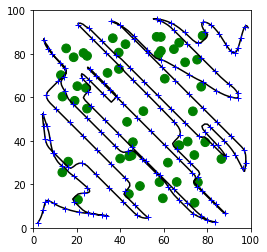

In [5]:
sol = solver.get_solution()

fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')

patches = []
for ob in obs: 
    circ = ob.draw()
    patches.append(circ)

ax.add_collection(PatchCollection(patches, color='g'))
ax.axis('square')
ax.set_xlim(0,100)
ax.set_ylim(0,100)

plt.savefig('')


In [5]:
sol['tf']

Array(47.907463, dtype=float32, weak_type=True)

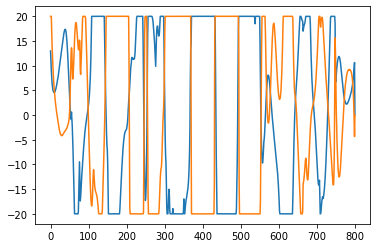

In [6]:
plt.plot(sol['u'])